<a href="https://colab.research.google.com/github/ZishanSayyed/FaceMask-Detection-Model-/blob/main/FaceMaskDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Maskdetection 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
import os
os.environ["KAGGLE_USERNAME"]="zishansayyed"
os.environ["KAGGLE_KEY"]="9fe5d1f8d4a59417713436d574b6242b"

In [ ]:
! kaggle datasets download -d prithwirajmitra/covid-face-mask-detection-dataset

 95% 197M/207M [00:03<00:00, 68.1MB/s]
100% 207M/207M [00:03<00:00, 69.5MB/s]


In [ ]:
! unzip covid-face-mask-detection-dataset.zip

In [ ]:
main_dir="/content/New Masks Dataset"

test_dir=os.path.join(main_dir,"Test")
train_dir=os.path.join(main_dir,"Train")
valid_dir=os.path.join(main_dir,"Validation")


train_mask_dir=os.path.join(train_dir,"Mask")
train_nomask_dir=os.path.join(train_dir,"Non Mask")

In [ ]:
train_mask_names=os.listdir(train_mask_dir)
print(train_mask_names[:10])

train_nomask_names=os.listdir(train_nomask_dir)
print(train_nomask_names[:10])


['1608.jpeg', '0166.jpg', '0243.jpg', '1383.jpg', '0466.jpg', '0769.jpg', '1462.jpg', '0676.jpg', '1511.jpg', '1491.jpg']
['208.jpg', '353.jpg', '210.jpg', '168.jpg', '197.jpg', '93.jpg', '321.jpg', '252.jpg', '178.jpg', '347.jpg']


In [ ]:
import matplotlib.image as mimg
nrows=5
ncols=5
plt.figure(figsize=(30,30))


mask_pic=[]
for i in train_mask_names[0:13]:
  mask_pic.append(os.path.join(train_mask_dir,i))


nomask_pic=[]
for i in train_nomask_names[0:12]:
  nomask_pic.append(os.path.join(train_nomask_dir,i))


<Figure size 2160x2160 with 0 Axes>

In [ ]:
print(mask_pic)

['/content/New Masks Dataset/Train/Mask/1608.jpeg', '/content/New Masks Dataset/Train/Mask/0166.jpg', '/content/New Masks Dataset/Train/Mask/0243.jpg', '/content/New Masks Dataset/Train/Mask/1383.jpg', '/content/New Masks Dataset/Train/Mask/0466.jpg', '/content/New Masks Dataset/Train/Mask/0769.jpg', '/content/New Masks Dataset/Train/Mask/1462.jpg', '/content/New Masks Dataset/Train/Mask/0676.jpg', '/content/New Masks Dataset/Train/Mask/1511.jpg', '/content/New Masks Dataset/Train/Mask/1491.jpg', '/content/New Masks Dataset/Train/Mask/1053.jpg', '/content/New Masks Dataset/Train/Mask/0128.png', '/content/New Masks Dataset/Train/Mask/1536.jpg']


In [ ]:
print(nomask_pic)

['/content/New Masks Dataset/Train/Non Mask/208.jpg', '/content/New Masks Dataset/Train/Non Mask/353.jpg', '/content/New Masks Dataset/Train/Non Mask/210.jpg', '/content/New Masks Dataset/Train/Non Mask/168.jpg', '/content/New Masks Dataset/Train/Non Mask/197.jpg', '/content/New Masks Dataset/Train/Non Mask/93.jpg', '/content/New Masks Dataset/Train/Non Mask/321.jpg', '/content/New Masks Dataset/Train/Non Mask/252.jpg', '/content/New Masks Dataset/Train/Non Mask/178.jpg', '/content/New Masks Dataset/Train/Non Mask/347.jpg', '/content/New Masks Dataset/Train/Non Mask/56.jpg', '/content/New Masks Dataset/Train/Non Mask/338.jpg']


In [ ]:
merged=mask_pic+nomask_pic
print(merged)
print(len(merged))

['/content/New Masks Dataset/Train/Mask/1608.jpeg', '/content/New Masks Dataset/Train/Mask/0166.jpg', '/content/New Masks Dataset/Train/Mask/0243.jpg', '/content/New Masks Dataset/Train/Mask/1383.jpg', '/content/New Masks Dataset/Train/Mask/0466.jpg', '/content/New Masks Dataset/Train/Mask/0769.jpg', '/content/New Masks Dataset/Train/Mask/1462.jpg', '/content/New Masks Dataset/Train/Mask/0676.jpg', '/content/New Masks Dataset/Train/Mask/1511.jpg', '/content/New Masks Dataset/Train/Mask/1491.jpg', '/content/New Masks Dataset/Train/Mask/1053.jpg', '/content/New Masks Dataset/Train/Mask/0128.png', '/content/New Masks Dataset/Train/Mask/1536.jpg', '/content/New Masks Dataset/Train/Non Mask/208.jpg', '/content/New Masks Dataset/Train/Non Mask/353.jpg', '/content/New Masks Dataset/Train/Non Mask/210.jpg', '/content/New Masks Dataset/Train/Non Mask/168.jpg', '/content/New Masks Dataset/Train/Non Mask/197.jpg', '/content/New Masks Dataset/Train/Non Mask/93.jpg', '/content/New Masks Dataset/Tra

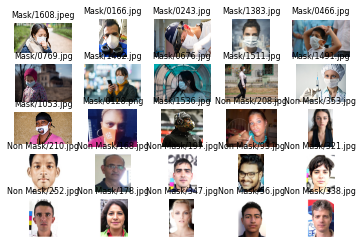

In [ ]:
for i in range(0,len(merged)):
  data=merged[i].split("/",4)[4]
  sp=plt.subplot(nrows,ncols,i+1)
  sp.axis("off")
  image=mimg.imread(merged[i])
  sp.set_title(data,fontsize=8)
  plt.imshow(image,cmap="gray")

plt.show()

In [ ]:
train_dgen=ImageDataGenerator(rescale=1/255,
                              zoom_range=0.2,
                              rotation_range=50,
                              horizontal_flip=True
                              )


test_dgen=ImageDataGenerator(rescale=1/255)
valid_dgen=ImageDataGenerator(rescale=1/255)

In [ ]:
train_gen=train_dgen.flow_from_directory(train_dir,
                                         target_size=(150,150),
                                         batch_size=32,
                                         class_mode="binary")

Found 600 images belonging to 2 classes.


In [ ]:
test_gen=test_dgen.flow_from_directory(test_dir,
                                         target_size=(150,150),
                                         batch_size=32,
                                         class_mode="binary")

Found 100 images belonging to 2 classes.


In [ ]:
valid_gen=valid_dgen.flow_from_directory(valid_dir,
                                         target_size=(150,150),
                                         batch_size=32,
                                         class_mode="binary")

Found 306 images belonging to 2 classes.


In [ ]:
train_gen.class_indices
train_gen.image_shape

(150, 150, 3)

In [ ]:
#performing CNN and Building modle

model=Sequential()
#adding 1st layer
model.add(Conv2D(32,(3,3),padding="SAME",activation="relu",input_shape=(150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))


#adding 2nd layer
model.add(Conv2D(64,(3,3),padding="SAME",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

#falttening the layer
model.add(Flatten())


model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 37, 37, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 87616)             0

In [ ]:
#preparing the model for tainning , testing and Validation 

model.compile(Adam(learning_rate=0.001),loss="binary_crossentropy",metrics=["accuracy"])

In [ ]:
trainning=model.fit(train_gen,
                    epochs=30,
                    validation_data=valid_gen)


Epoch 1/30
19/19 [==============================] - 13s 685ms/step - loss: 3.4092 - accuracy: 0.5250 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/30
19/19 [==============================] - 13s 665ms/step - loss: 0.6743 - accuracy: 0.6017 - val_loss: 0.6923 - val_accuracy: 0.5261
Epoch 3/30
19/19 [==============================] - 13s 680ms/step - loss: 0.4957 - accuracy: 0.7700 - val_loss: 0.5036 - val_accuracy: 0.7549
Epoch 4/30
19/19 [==============================] - 13s 675ms/step - loss: 0.3395 - accuracy: 0.8650 - val_loss: 0.3972 - val_accuracy: 0.8562
Epoch 5/30
19/19 [==============================] - 12s 656ms/step - loss: 0.3234 - accuracy: 0.8733 - val_loss: 0.4150 - val_accuracy: 0.8399
Epoch 6/30
19/19 [==============================] - 13s 676ms/step - loss: 0.2776 - accuracy: 0.9117 - val_loss: 0.3361 - val_accuracy: 0.8660
Epoch 7/30
19/19 [==============================] - 13s 666ms/step - loss: 0.2761 - accuracy: 0.9050 - val_loss: 0.3250 - val_accuracy: 0.8725

In [ ]:
trainning.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Text(0.5, 0, 'epoch')

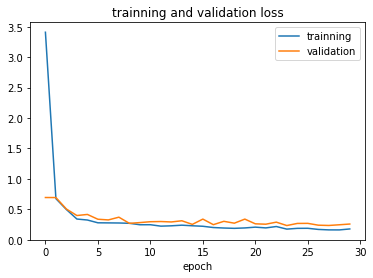

In [ ]:
plt.plot(trainning.history["loss"])
plt.plot(trainning.history["val_loss"])
plt.legend(["trainning","validation"])
plt.title("trainning and validation loss")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

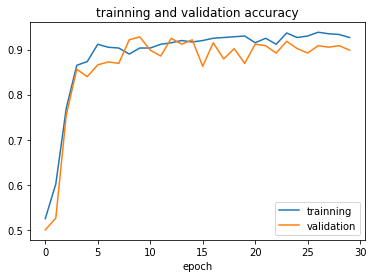

In [ ]:
plt.plot(trainning.history["accuracy"])
plt.plot(trainning.history["val_accuracy"])
plt.legend(["trainning","validation"])
plt.title("trainning and validation accuracy")
plt.xlabel("epoch")

In [ ]:
#running model on test data

test_loss ,test_acc=model.evaluate(test_gen)


4/4 [==============================] - 1s 242ms/step - loss: 0.2213 - accuracy: 0.8900


In [ ]:
#now seeing how model works by providing data which was not present prviously
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()
for fname in uploaded.keys():
  img_path="/content/"+fname
  img= image.load_img(img_path , target_size=(150,150))
  images=image.img_to_array(img)
  images=np.expand_dims(images,axis=0)
  prediction=model.predict(images)
  print(fname)
  if prediction==0:
    print("Mask")

  else:
    print("No Mask")


Saving 1493458748-beauty-face-517.jpg to 1493458748-beauty-face-517.jpg
Saving mask.jpg to mask.jpg
1493458748-beauty-face-517.jpg
No Mask
mask.jpg
Mask


In [ ]:
model.save("mask_detection_model.h5")

In [ ]:
#END